In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [3]:
train = pd.read_csv("train_updated.csv")
vald = pd.read_csv("validation_updated.csv")
test = pd.read_csv("test_updated.csv")

In [4]:
train

,Unnamed: 0,NCBIGeneID,Symbol,Description,GeneType,GeneGroupMethod,NucleotideSequence,Clean_Seq,Sequence_length,A,T,G,C,GC_content
0,0,106481178,RNU4-21P,"RNA, U4 small nuclear 21, pseudogene",PSEUDO,NCBI Ortholog,<AGCTTAGCACAGTGGCAGTATCATAGGCAGTGAGGTTTATCCGAG...,AGCTTAGCACAGTGGCAGTATCATAGGCAGTGAGGTTTATCCGAGG...,126,31,41,31,23,42.857143
1,1,123477792,LOC123477792,Sharpr-MPRA regulatory region 12926,BIOLOGICAL_REGION,NCBI Ortholog,<CTGGAGCGGCCACGATGTGAACTGTCACCGGCCACTGCTGCTCCG...,CTGGAGCGGCCACGATGTGAACTGTCACCGGCCACTGCTGCTCCGA...,295,76,68,70,81,51.186441
2,2,113174975,LOC113174975,Sharpr-MPRA regulatory region 7591,BIOLOGICAL_REGION,NCBI Ortholog,<TTCCCAATTTTTCCTCTGCTTTTTAATTTTCTAGTTTCCTTTTTC...,TTCCCAATTTTTCCTCTGCTTTTTAATTTTCTAGTTTCCTTTTTCC...,295,62,107,27,99,42.711864
3,3,116216107,LOC116216107,CRISPRi-validated cis-regulatory element chr10...,BIOLOGICAL_REGION,NCBI Ortholog,<CGCCCAGGCTGGAGTGCAGTGGCGCCATCTCGGCTCACTGCAGGC...,CGCCCAGGCTGGAGTGCAGTGGCGCCATCTCGGCTCACTGCAGGCT...,276,63,61,92,60,55.072464
4,4,28502,IGHD2-21,immunoglobulin heavy diversity 2-21,OTHER,NCBI Ortholog,<AGCATATTGTGGTGGTGACTGCTATTCC>,AGCATATTGTGGTGGTGACTGCTATTCC,28,5,10,8,5,46.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22588,19009,124907055,LOC124907055,uncharacterized LOC124907055,ncRNA,NCBI Ortholog,<GGTGGGGTGGGGTGGGGTGGGGTGGGGTGCAGAGAAAACGATTGA...,GGTGGGGTGGGGTGGGGTGGGGTGGGGTGCAGAGAAAACGATTGAT...,978,141,339,232,266,50.920245
22589,19012,106480032,RNU6-1060P,"RNA, U6 small nuclear 1060, pseudogene",PSEUDO,NCBI Ortholog,<GTGCTCACTTCAGCAGCACATATACTAAAATTGGAATGATACAGA...,GTGCTCACTTCAGCAGCACATATACTAAAATTGGAATGATACAGAG...,106,35,28,22,21,40.566038
22590,19015,106481029,RN7SL387P,"RNA, 7SL, cytoplasmic 387, pseudogene",PSEUDO,NCBI Ortholog,<GCTGGGCGTGGTGGTGGGTGCCTGTAATCCCAGCTACTAGGGAGG...,GCTGGGCGTGGTGGTGGGTGCCTGTAATCCCAGCTACTAGGGAGGC...,273,65,62,75,71,53.479853
22591,19019,100286918,NDUFS5P2,NADH:ubiquinone oxidoreductase subunit S5 pseu...,PSEUDO,NCBI Ortholog,<TCGTCCTGAAGCAGCGGCCAGAGAAGAGACAAGGGCACGAGCATC...,TCGTCCTGAAGCAGCGGCCAGAGAAGAGACAAGGGCACGAGCATCA...,381,119,77,110,75,48.556430


In [24]:
def kmer_generator(seq,kmer_size):
    kmer_list = []
    for i in range(len(seq) - (kmer_size -1)):
        kmer = seq[i:i+kmer_size]
        kmer_list.append(kmer)
    return kmer_list

In [26]:
train["kmer"] = train["Clean_Seq"].apply(lambda seq: kmer_generator(seq, kmer_size = 3))
vald["kmer"] = vald["Clean_Seq"].apply(lambda seq: kmer_generator(seq, kmer_size = 3))
test["kmer"] = test["Clean_Seq"].apply(lambda seq: kmer_generator(seq, kmer_size=3))

In [41]:
train_m = train[["GeneType", "kmer"]].copy()
vald_m = vald[["GeneType", "kmer"]].copy()
test_m = test[["GeneType", "kmer"]].copy()

In [42]:
print("Train data shape:", train_m.shape)
print("validation data shape:", vald_m.shape)
print("Test data shape:", test_m.shape)

Train data shape: (22593, 2)
validation data shape: (4577, 2)
Test data shape: (8326, 2)


In [43]:
le = LabelEncoder()
le.fit(train_m["GeneType"])

LabelEncoder()

In [44]:
train_m["GeneType_num"] = le.transform(train_m["GeneType"])
vald_m["GeneType_num"] = le.transform(vald_m["GeneType"])
test_m["GeneType_num"] = le.transform(test_m["GeneType"])

In [62]:
train_m

,GeneType,kmer,GeneType_num
0,PSEUDO,"[AGC, GCT, CTT, TTA, TAG, AGC, GCA, CAC, ACA, ...",3
1,BIOLOGICAL_REGION,"[CTG, TGG, GGA, GAG, AGC, GCG, CGG, GGC, GCC, ...",0
2,BIOLOGICAL_REGION,"[TTC, TCC, CCC, CCA, CAA, AAT, ATT, TTT, TTT, ...",0
3,BIOLOGICAL_REGION,"[CGC, GCC, CCC, CCA, CAG, AGG, GGC, GCT, CTG, ...",0
4,OTHER,"[AGC, GCA, CAT, ATA, TAT, ATT, TTG, TGT, GTG, ...",1
...,...,...,...
22588,ncRNA,"[GGT, GTG, TGG, GGG, GGG, GGT, GTG, TGG, GGG, ...",4
22589,PSEUDO,"[GTG, TGC, GCT, CTC, TCA, CAC, ACT, CTT, TTC, ...",3
22590,PSEUDO,"[GCT, CTG, TGG, GGG, GGC, GCG, CGT, GTG, TGG, ...",3
22591,PSEUDO,"[TCG, CGT, GTC, TCC, CCT, CTG, TGA, GAA, AAG, ...",3


In [141]:
kmers_train = []
for i in train_m["kmer"]:
    for j in i:
        kmers_train.append(j)

kmers_vald = []
for i in vald_m["kmer"]:
    for j in i:
        kmers_vald.append(j)

kmers_test = []
for i in test_m["kmer"]:
    for j in i:
        kmers_test.append(j)

In [142]:
train_kmer_count = {}

for kmer in kmers_train:
    if kmer not in train_kmer_count:
        train_kmer_count[kmer] = 1
    else:
        train_kmer_count[kmer] += 1

vald_kmer_count = {}
for kmer in kmers_vald:
    if kmer not in vald_kmer_count:
        vald_kmer_count[kmer] = 1
    else:
        vald_kmer_count[kmer] += 1

test_kmer_count = {}
for kmer in kmers_test:
    if kmer not in test_kmer_count:
        test_kmer_count[kmer] = 1
    else:
        test_kmer_count[kmer] += 1

In [143]:
train_kmer_freq_df = pd.DataFrame(list(train_kmer_count.items()),columns=["k-mer", "Frequency"])
vald_kmer_freq_df = pd.DataFrame(list(vald_kmer_count.items()),columns=["k-mer", "Frequency"])
test_kmer_freq_df = pd.DataFrame(list(test_kmer_count.items()),columns=["k-mer", "Frequency"])

train_kmer_freq_df = train_kmer_freq_df.sort_values(by="Frequency", ascending=False)
vald_kmer_freq_df = vald_kmer_freq_df.sort_values(by="Frequency", ascending=False)
test_kmer_freq_df = test_kmer_freq_df.sort_values(by="Frequency", ascending=False)

In [93]:
#train_m.to_csv("train_classification.csv", index=False)
#vald_m.to_csv("validation_classification.csv", index = False)
#test_m.to_csv("test_classification.csv", index = False)

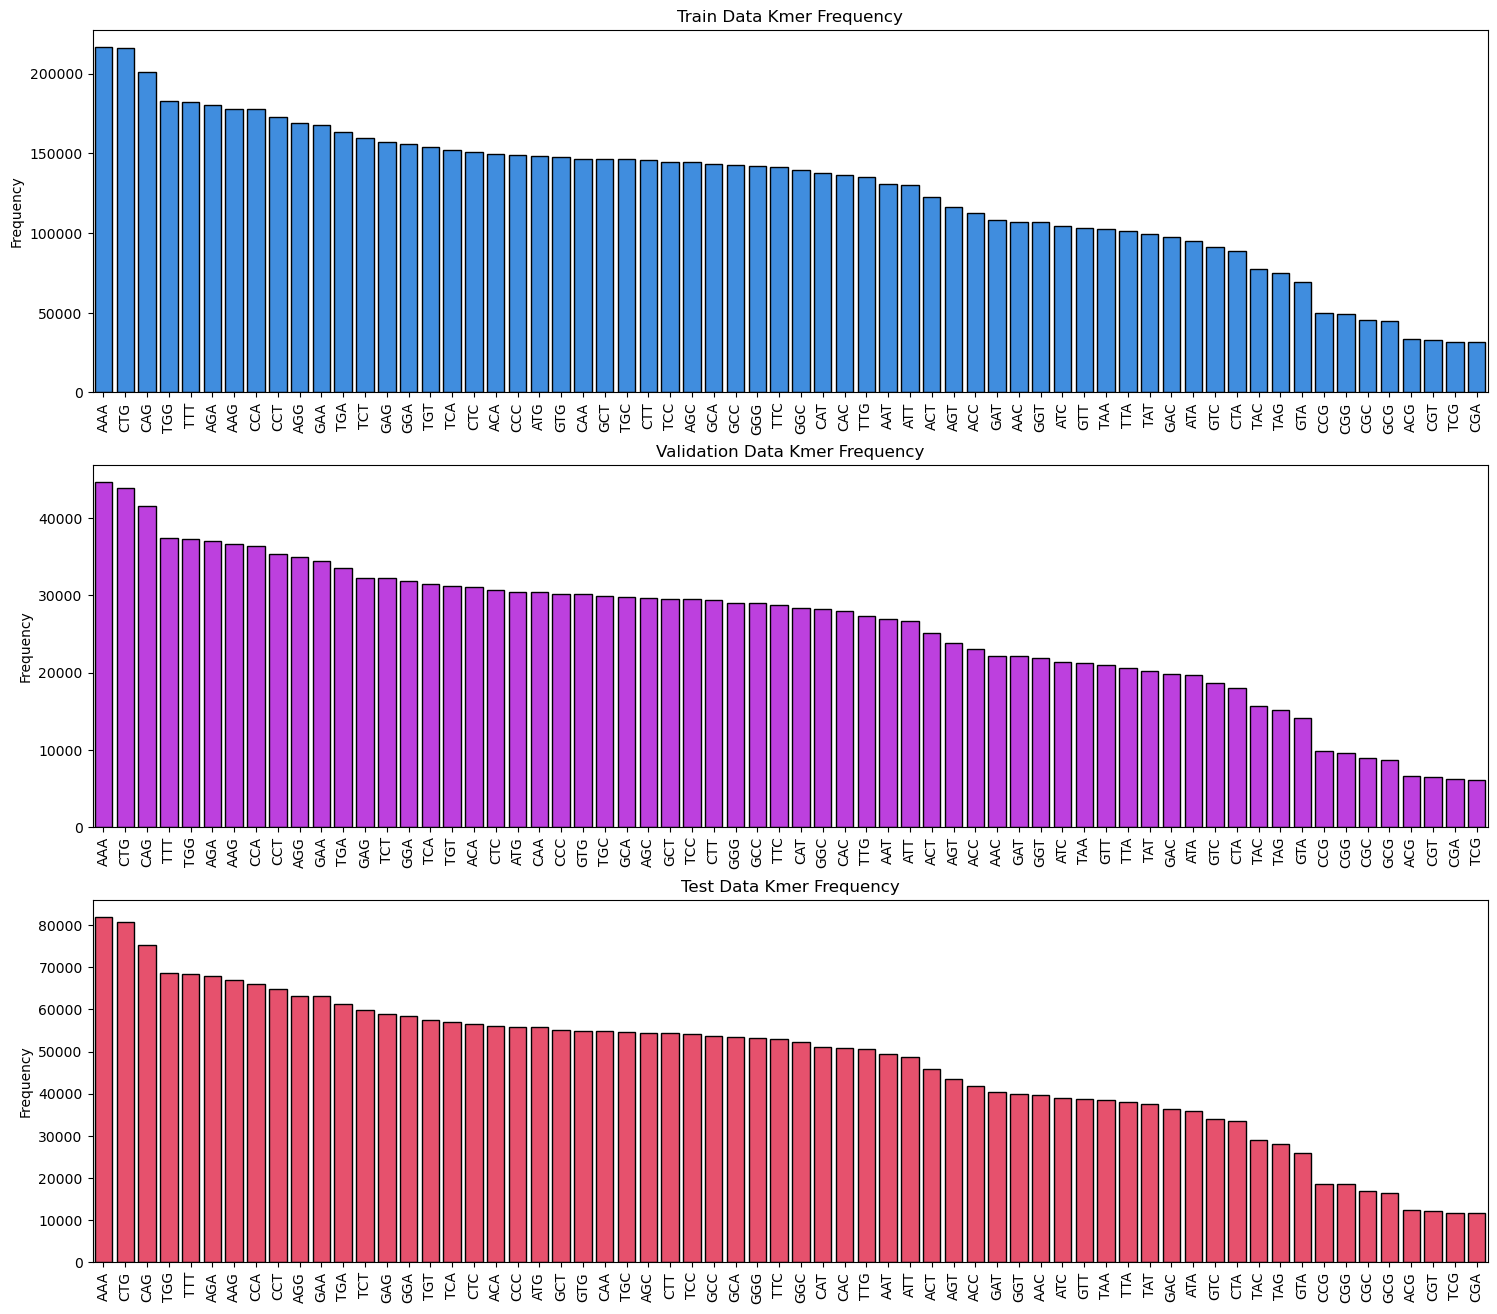

In [151]:
fig, axes = plt.subplots(3, 1, figsize=(18,16))

sns.barplot(train_kmer_freq_df, x="k-mer", y="Frequency", color = "#268df8", edgecolor = "black", ax=axes[0])
axes[0].tick_params(axis = "x", rotation=90);
axes[0].set_title("Train Data Kmer Frequency")
axes[0].set_xlabel("")

sns.barplot(vald_kmer_freq_df, x="k-mer", y="Frequency", color = "#cc26f8", edgecolor = "black", ax=axes[1])
axes[1].tick_params(axis = "x", rotation=90);
axes[1].set_title("Validation Data Kmer Frequency")
axes[1].set_xlabel("")

sns.barplot(test_kmer_freq_df, x="k-mer", y="Frequency", color = "#ff385e", edgecolor = "black", ax=axes[2])
axes[2].tick_params(axis = "x", rotation=90);
axes[2].set_title("Test Data Kmer Frequency")
axes[2].set_xlabel("");

In [153]:
train_kmers_str = " ".join(kmers_train)
vald_kmers_str = " ".join(kmers_vald)
test_kmers_str = " ".join(kmers_test)

train_kmer_cloud = WordCloud(width=800, height=400, background_color="white").generate(train_kmers_str)
vald_kmer_cloud = WordCloud(width=800, height=400, background_color="white").generate(vald_kmers_str)
test_kmer_cloud = WordCloud(width=800, height=400, background_color="white").generate(test_kmers_str)

Text(0.5, 1.0, 'Test Data kmers')

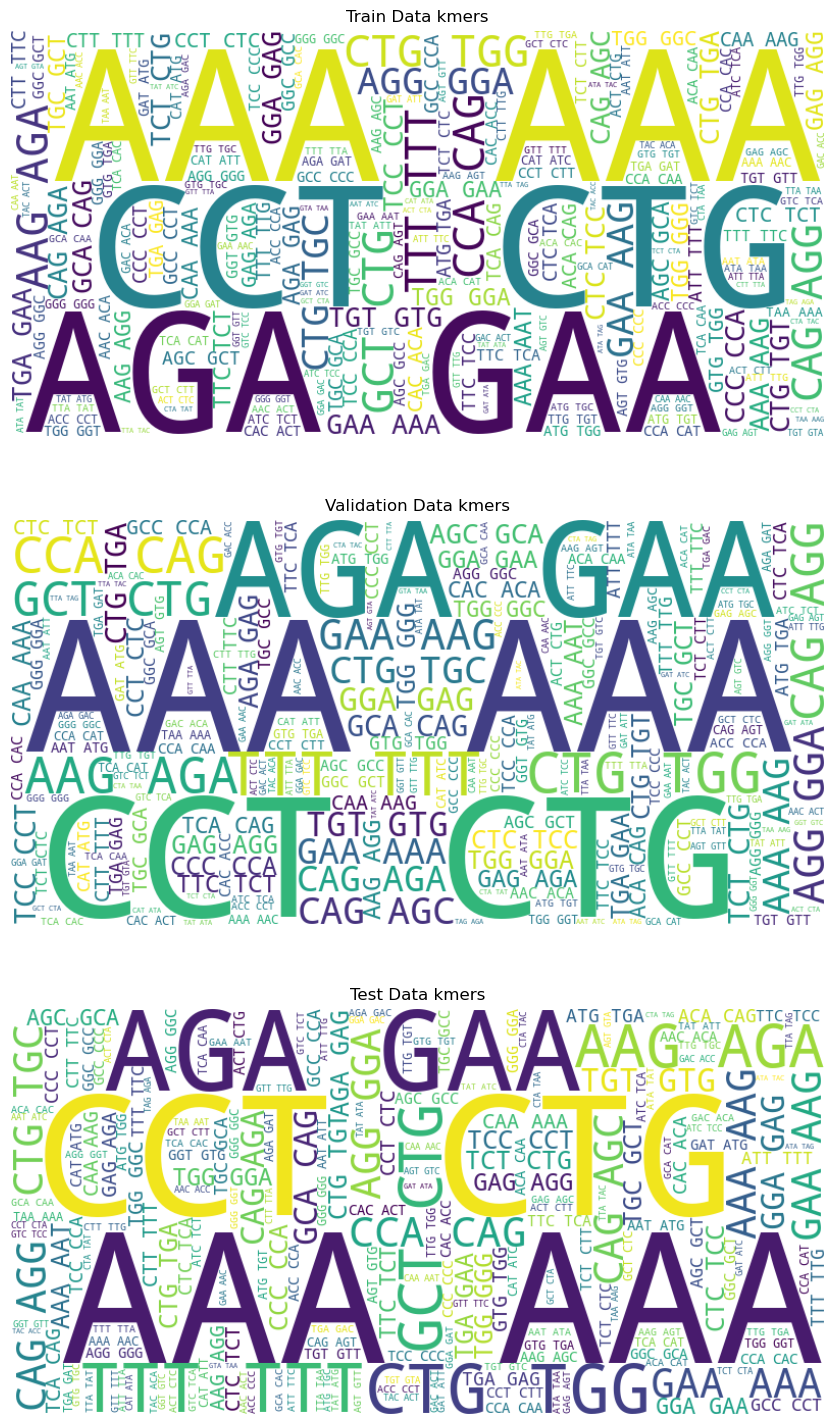

In [157]:
fig, axes = plt.subplots(3,1, figsize = (12,18))

axes[0].imshow(train_kmer_cloud, interpolation = "bilinear")
axes[0].axis("off")
axes[0].set_title("Train Data kmers")

axes[1].imshow(vald_kmer_cloud, interpolation = "bilinear")
axes[1].axis("off")
axes[1].set_title("Validation Data kmers")

axes[2].imshow(test_kmer_cloud, interpolation = "bilinear")
axes[2].axis("off")
axes[2].set_title("Test Data kmers")